In [ ]:
#Parte 1 

In [134]:
import pandas as pd
import os


# Cargar la tabla acortada directamente
df = pd.read_excel("Tabla_acortada1.xlsx")

# Ver las primeras filas
df.head()


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,TQRMNOSYUHKNKMCDEIGED00856897,2024,1,1,1,1,43,N,30,159,...,7,7,NaN,8.0,6,231.0,NaN,NaN,NaN,NaN
1,TQRMNOSYUHKNKMCDEIGED00856897,2024,1,1,2,1,43,N,30,159,...,7,7,NaN,8.0,6,231.0,NaN,NaN,NaN,NaN
2,TQRMNORTVHLOKQCDEIMBF00855868,2024,1,1,1,1,43,N,36,138,...,3,3,NaN,4.0,3,144.0,NaN,NaN,NaN,NaN
3,TQRMNORTVHLOKQCDEIMBF00855868,2024,1,1,2,1,43,N,36,138,...,3,3,NaN,4.0,3,144.0,NaN,NaN,NaN,NaN
4,TQRMNORSXHMLLOCDEIMBF00802814,2024,1,1,1,1,43,N,36,149,...,10,10,NaN,10.0,10,194.0,NaN,NaN,NaN,NaN


In [140]:
# Asegurarse de que las columnas son string
cat_vars = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'CAT_OCUP', 'PP02C1']
for col in cat_vars:
    df[col] = df[col].astype(str).str.strip()

# CH04 – Sexo: texto a código
df['CH04'] = df['CH04'].replace({
    'Hombre': 1,
    'Mujer': 2
})

# CH07 – Estado civil
df['CH07'] = df['CH07'].replace({
    'unido?': 1,
    'casado?': 2,
    'separado/a o divorciado/a?': 3,
    'viudo/a?': 4,
    'soltero/a?': 5
})

# CH08 – Cobertura médica
df['CH08'] = df['CH08'].replace({
    'Obra social': 1,
    'Mutual / prepaga / servicio de emergencia': 2,
    'Planes y seguros públicos': 3,
    'No paga ni le descuentan': 4,
    'Obra social y mutual / prepaga / servicio de emergencia': 12,
    'Obra social y planes y seguros públicos': 13,
    'Mutual / prepaga / servicio de emergencia / Planes y seguros públicos': 23,
    'Obra social, mutual / prepaga / servicio de emergencia y planes y seguros públicos': 123
})

# NIVEL_ED – Nivel educativo
df['NIVEL_ED'] = df['NIVEL_ED'].replace({
    'Prim. incompleta': 1,
    'Prim. completa': 2,
    'Sec. incompleta': 3,
    'Sec. completa': 4,
    'Univ. incompleta': 5,
    'Univ. completa': 6,
    'Sin instrucción': 7,
    'Ns/Nr': 9
})

# ESTADO – Condición de actividad
df['ESTADO'] = df['ESTADO'].replace({
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3
})

# CAT_INAC – Inactividad
df['CAT_INAC'] = df['CAT_INAC'].replace({
    'Jubilado/Pensionado': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Ama de casa': 4,
    'Menor de 6': 5,
    'Discapacitado': 6,
    'Otros': 7
})

# CAT_OCUP – Categoría ocupacional
df['CAT_OCUP'] = df['CAT_OCUP'].replace({
    'Patrón': 1,
    'Cuenta propia': 2,
    'Empleado': 3,
    'Familiar no remunerado': 4,
    'Ns/Nr': 9
})

# PP02C1 – Búsqueda activa
df['PP02C1'] = df['PP02C1'].replace({
    'Sí': 1,
    'No': 0
})

# Convertir a tipo numérico por si quedan strings numéricos
for col in cat_vars:
    df[col] = pd.to_numeric(df[col], errors='coerce').round(0).astype('Int64')  # Int64 admite NaNs

# Verificamos
print(df[cat_vars].head())


   CH04  CH07  CH08  NIVEL_ED  ESTADO  CAT_INAC  CAT_OCUP  PP02C1
0     1     5     4         3       1         0         2       0
1     2     5     1         6       1         0         3       0
2     2     2     1         2       3         4         0       0
3     1     2     1         3       1         0         3       0
4     2     2     1         4       3         4         0       0


In [138]:
#1
print("Cantidad de observaciones:", df.shape[0])
print("Cantidad de variables:", df.shape[1])

Cantidad de observaciones: 4883
Cantidad de variables: 181


In [142]:
#2

# Detectamos variables categóricas (tipo object o categoría)
cat_vars = df.select_dtypes(include=['object', 'category']).columns

# Calculamos cuántas dummies nuevas tendría cada una
total_nuevas_columnas = 0
detalle = {}

for var in cat_vars:
    n_cat = df[var].nunique()
    total_nuevas_columnas += n_cat  # o n_cat - 1 si querés usar drop_first=True
    detalle[var] = n_cat

print("El número total de nuevas columnas (dummies) sería:", total_nuevas_columnas)
print("Detalle por variable categórica:")
for var, cats in detalle.items():
    print(f" - {var}: {cats} categorías")


El número total de nuevas columnas (dummies) sería: 3387
Detalle por variable categórica:
 - CODUSU: 1799 categorías
 - TRIMESTRE: 2 categorías
 - COMPONENTE: 14 categorías
 - H15: 4 categorías
 - REGION: 2 categorías
 - MAS_500: 2 categorías
 - AGLOMERADO: 4 categorías
 - CH03: 20 categorías
 - CH06: 100 categorías
 - CH09: 6 categorías
 - CH10: 7 categorías
 - CH11: 5 categorías
 - CH12: 20 categorías
 - CH13: 6 categorías
 - CH14: 24 categorías
 - CH15: 10 categorías
 - CH15_COD: 54 categorías
 - CH16: 12 categorías
 - CH16_COD: 23 categorías
 - PP02C2: 5 categorías
 - PP02C3: 5 categorías
 - PP02C4: 5 categorías
 - PP02C5: 5 categorías
 - PP02C6: 5 categorías
 - PP02C7: 5 categorías
 - PP02C8: 4 categorías
 - PP02E: 7 categorías
 - PP02H: 5 categorías
 - PP02I: 5 categorías
 - PP03C: 5 categorías
 - PP03G: 5 categorías
 - PP03H: 5 categorías
 - PP03I: 6 categorías
 - PP03J: 6 categorías
 - INTENSI: 10 categorías
 - PP04A: 7 categorías
 - PP04B_COD: 179 categorías
 - PP04B1: 4 categ

In [144]:
#3
# Creamos dummies (eliminando la primera categoría de cada variable)
df_final = pd.get_dummies(df, columns=cat_vars, drop_first=True)

# Ver resultado
print("✅ Dimensión final con dummies:", df_final.shape)
df_final.head()


✅ Dimensión final con dummies: (4883, 3364)


,ANO4,NRO_HOGAR,PONDERA,CH04,CH05,CH07,CH08,NIVEL_ED,ESTADO,CAT_OCUP,...,GDECCFR_6,GDECCFR_7,GDECCFR_8,GDECCFR_9,GDECCFR_10,GDECCFR_12,GDECCFR_,PJ1_1_Tiene plan jefas y jefes,PJ2_1_Tiene plan jefas y jefes,PJ3_1_Tiene plan jefas y jefes
0,2024,1,159,1,1977-10-11,5,4,3,1,2,...,False,False,False,False,False,False,False,False,False,False
1,2024,1,159,2,1975-06-17,5,1,6,1,3,...,False,False,False,False,False,False,False,False,False,False
2,2024,1,138,2,1900-01-01,2,1,2,3,0,...,False,False,False,False,False,False,False,False,False,False
3,2024,1,138,1,1982-08-17,2,1,3,1,3,...,False,False,False,False,False,False,False,False,False,False
4,2024,1,149,2,1949-06-06,2,1,4,3,0,...,False,False,False,False,False,False,False,False,False,False


In [158]:
#3

# 2. Seleccionar las 10 variables
variables_elegidas = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 
                      'ESTADO', 'CAT_INAC', 'IPCF', 'PP02C1', 'CAT_OCUP']
df = df[variables_elegidas].copy()

# 3. Reemplazar texto por valores numéricos (por si vienen como string)
# Convertimos todo a string primero para reemplazar bien
for col in df.columns:
    df[col] = df[col].astype(str).str.strip()

# CH04 – Sexo
df['CH04'] = df['CH04'].replace({'Hombre': 1, 'Mujer': 2})


# CH07 – Estado civil
df['CH07'] = df['CH07'].replace({
    'unido?': 1, 'casado?': 2, 'separado/a o divorciado/a?': 3,
    'viudo/a?': 4, 'soltero/a?': 5
})

# CH08 – Cobertura médica
df['CH08'] = df['CH08'].replace({
    'Obra social': 1,
    'Mutual / prepaga / servicio de emergencia': 2,
    'Planes y seguros públicos': 3,
    'No paga ni le descuentan': 4,
    'Obra social y mutual / prepaga / servicio de emergencia': 12,
    'Obra social y planes y seguros públicos': 13,
    'Mutual / prepaga / servicio de emergencia / Planes y seguros públicos': 23,
    'Obra social, mutual / prepaga / servicio de emergencia y planes y seguros públicos': 123
})

# NIVEL_ED
df['NIVEL_ED'] = df['NIVEL_ED'].replace({
    'Prim. incompleta': 1, 'Prim. completa': 2, 'Sec. incompleta': 3,
    'Sec. completa': 4, 'Univ. incompleta': 5, 'Univ. completa': 6,
    'Sin instrucción': 7, 'Ns/Nr': 9
})

# ESTADO
df['ESTADO'] = df['ESTADO'].replace({
    'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3
})

# CAT_INAC
df['CAT_INAC'] = df['CAT_INAC'].replace({
    'Jubilado/Pensionado': 1, 'Rentista': 2, 'Estudiante': 3,
    'Ama de casa': 4, 'Menor de 6': 5, 'Discapacitado': 6, 'Otros': 7
})

# CAT_OCUP
df['CAT_OCUP'] = df['CAT_OCUP'].replace({
    'Patrón': 1, 'Cuenta propia': 2, 'Empleado': 3,
    'Familiar no remunerado': 4, 'Ns/Nr': 9
})

# PP02C1
df['PP02C1'] = df['PP02C1'].replace({'Sí': 1, 'No': 0})

# 4. Convertir todas las columnas a numéricas enteras sin decimales
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').round(0).astype('Int64')

# 5. Verificar valores únicos antes de generar dummies
print("Valores únicos por variable:")
for col in df.columns:
    print(f"{col}: {df[col].dropna().unique()}")

# 6. Crear dummies (solo si tienen más de 1 valor)
variables_para_dummies = [col for col in df.columns if df[col].nunique() > 1 and col != 'CH06' and col != 'IPCF']
df_final = pd.get_dummies(df, columns=variables_para_dummies, drop_first=True)

# 7. Verificar columnas creadas
print("\n✅ Columnas dummy creadas correctamente:")
for var in variables_para_dummies:
    columnas = [col for col in df_final.columns if col.startswith(var + "_")]
    print(f"{var}: {columnas}")

# 8. Mostrar resultado final
print("\n✅ df_final listo para análisis. Dimensión:", df_final.shape)
df_final.head()
df_final = df_final.astype(int)



Valores únicos por variable:
CH04: <IntegerArray>
[1, 2]
Length: 2, dtype: Int64
CH06: <IntegerArray>
[ 46,  48,  55,  41,  74,  77,  52,  82,  32,   9,   4,  73,  64,  63,  59,
  34,  26,  20,  69,  87,  49,  43,  51,  50,   7,  44,  42,  11,   6,  18,
  28,  22,  62,  15,  21,  71,  39,  37,  33,  16,   2,  57,  61,  40,  31,
  19,  13,  79,  25,  23,  14,  56,  75,  36,  38,  10,   3,  30,  67,  29,
   5,  84,  45,  78,  58,  24,  12,  70,  91,   8,  35,  66,  65,   1,  47,
  60,  99,  54,  17,  76,  72,  53,  86,  81,  83,  27,  -1,  68,  80,  89,
  92,  90,  85,  97,  88,  93, 100,  96,  98]
Length: 99, dtype: Int64
CH07: <IntegerArray>
[5, 2, 4, 1, 3]
Length: 5, dtype: Int64
CH08: <IntegerArray>
[4, 1, 3, 2, 12, 9, 13]
Length: 7, dtype: Int64
NIVEL_ED: <IntegerArray>
[3, 6, 2, 4, 1, 7, 5]
Length: 7, dtype: Int64
ESTADO: <IntegerArray>
[1, 3, 4, 2, 0]
Length: 5, dtype: Int64
CAT_INAC: <IntegerArray>
[0, 4, 1, 3, 5, 6, 7, 2]
Length: 8, dtype: Int64
IPCF: <IntegerArray>
[266667, 125

ValueError: cannot convert NA to integer

In [160]:
print("Columnas con valores faltantes:")
print(df_final.isna().sum()[df_final.isna().sum() > 0])



Columnas con valores faltantes:
CH06    11
dtype: int64


In [ ]:
#Parte II

In [165]:
print(df["ESTADO"].value_counts())

respondieron = df[df["ESTADO"].notna()]  # Filtra los que tienen un valor válido en ESTADO
norespondieron = df[df["ESTADO"].isna()]  # Filtra los que tienen NaN en ESTADO

respondieron.to_excel("respondieron.xlsx", index=False)
norespondieron.to_excel("norespondieron.xlsx", index=False)

print(f"Personas que respondieron: {respondieron.shape[0]}")
print(f"Personas que NO respondieron: {norespondieron.shape[0]}")

ESTADO
1    2162
3    1926
4     511
2     181
0       2
Name: count, dtype: Int64
Personas que respondieron: 4782
Personas que NO respondieron: 101


Total de personas desocupadas: 136


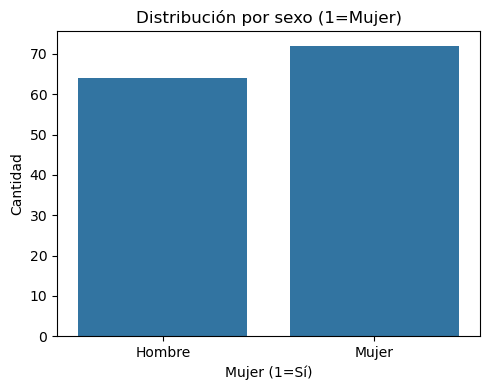

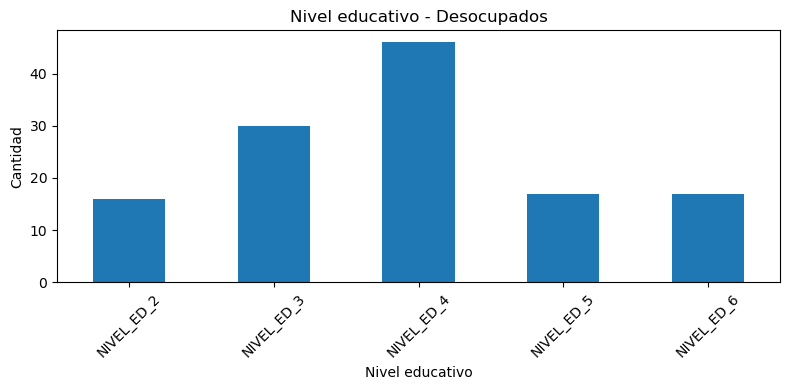

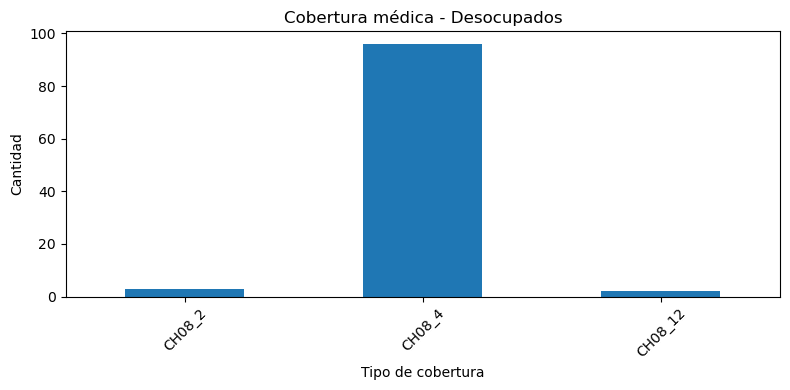

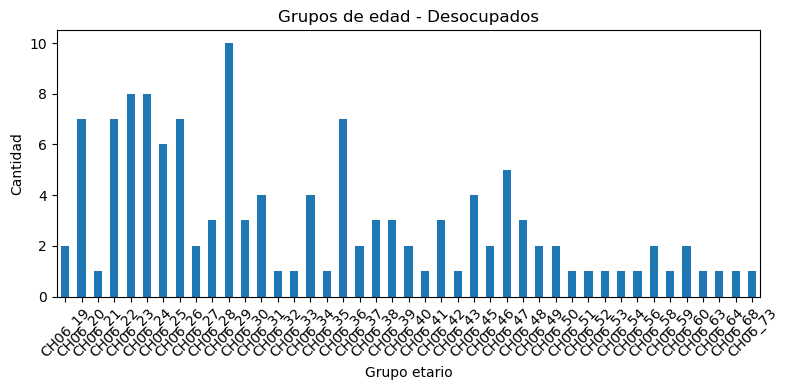

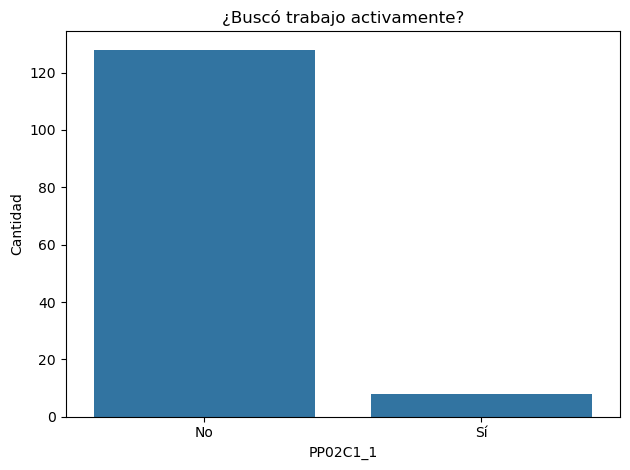

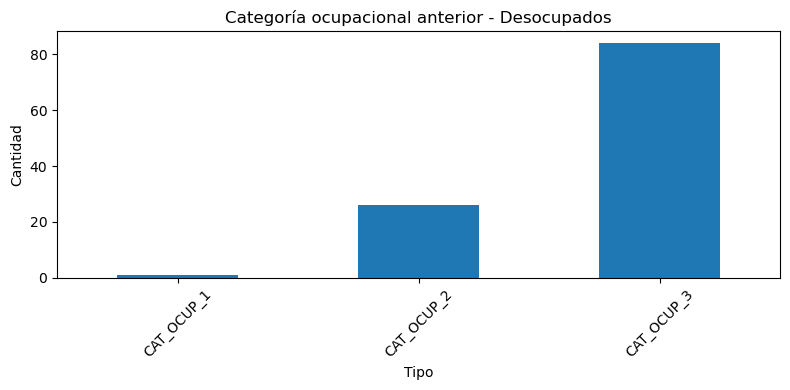

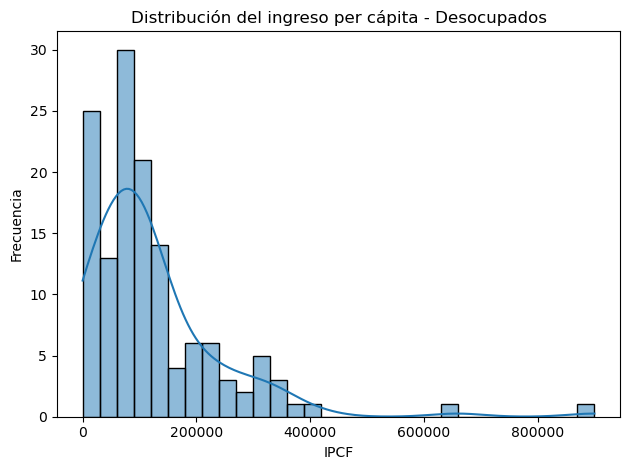

In [171]:
#1

# Filtrar personas que respondieron ESTADO con códigos válidos
df = df[df["ESTADO"].isin([1, 2, 3])]

binarias_relevantes = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'PP02C1', 'CAT_OCUP']

for col in binarias_relevantes:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_desocupados = df[df['ESTADO'] == 2]

print("Total de personas desocupadas:", df_desocupados.shape[0])


dummies_vars = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'PP02C1', 'CAT_OCUP']
df_dummies = pd.get_dummies(df_desocupados, columns=dummies_vars, drop_first=True)


## A. Sexo (CH04)
plt.figure(figsize=(5,4))
sns.countplot(x='CH04_2', data=df_dummies)
plt.title("Distribución por sexo (1=Mujer)")
plt.xlabel("Mujer (1=Sí)")
plt.ylabel("Cantidad")
plt.xticks([0,1], ['Hombre', 'Mujer'])
plt.tight_layout()
plt.show()

## B. Nivel educativo
nivel_cols = [col for col in df_dummies.columns if col.startswith('NIVEL_ED')]
df_dummies[nivel_cols].sum().plot(kind='bar', figsize=(8,4))
plt.title("Nivel educativo - Desocupados")
plt.ylabel("Cantidad")
plt.xlabel("Nivel educativo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## C. Cobertura médica
cobertura_cols = [col for col in df_dummies.columns if col.startswith('CH08')]
df_dummies[cobertura_cols].sum().plot(kind='bar', figsize=(8,4))
plt.title("Cobertura médica - Desocupados")
plt.ylabel("Cantidad")
plt.xlabel("Tipo de cobertura")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## D. Edad: si la habías categorizado en CH06_grupo
edad_cols = [col for col in df_dummies.columns if col.startswith('CH06')]
if edad_cols:
    df_dummies[edad_cols].sum().plot(kind='bar', figsize=(8,4))
    plt.title("Grupos de edad - Desocupados")
    plt.ylabel("Cantidad")
    plt.xlabel("Grupo etario")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## E. Búsqueda activa de empleo (PP02C1)
if 'PP02C1_1' in df_dummies.columns:
    sns.countplot(x='PP02C1_1', data=df_dummies)
    plt.title("¿Buscó trabajo activamente?")
    plt.xticks([0,1], ['No', 'Sí'])
    plt.ylabel("Cantidad")
    plt.tight_layout()
    plt.show()

## F. Ocupación anterior (CAT_OCUP)
ocup_cols = [col for col in df_dummies.columns if col.startswith('CAT_OCUP')]
if ocup_cols:
    df_dummies[ocup_cols].sum().plot(kind='bar', figsize=(8,4))
    plt.title("Categoría ocupacional anterior - Desocupados")
    plt.ylabel("Cantidad")
    plt.xlabel("Tipo")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## G. Ingreso per cápita (IPCF)
sns.histplot(df_dummies['IPCF'], kde=True, bins=30)
plt.title("Distribución del ingreso per cápita - Desocupados")
plt.xlabel("IPCF")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()
